<br/>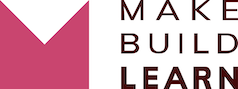<br/><br/>
<center style="color:#888">Visualización de datos</center>
<center style="color:#aaa; margin-top:10px;"><b>Prof. Óscar Fernández Angulo</b><br>oscarfa@faculty.mioti.es</center>
<p style="font-size: 2.5em; text-align:center">Challenge S2: Vinos y Supermercados</p><br/>

# Consideraciones previas

* Cada ejercicio se responderá con una sola figura y, si se considera necesario, un texto comentando los resultados.
* No existe una única respuesta correcta. 
* Se valorará positivamente usar diferentes tipos de gráficos durante el Challenge. Si no se repite ninguno, mejor.
* Los ejercicios están pensados para responderse con los conocimientos obtenidos en cualquiera de los Worksheets presentados hasta la fecha.


In [141]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import datetime
import math

matplotlib.rcParams.update({'font.size': 14})


# Primera parte: Vinos

En esta primera parte, trabajaremos con el dataset [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews). En éste, tenemos la información de un gran número de vinos como el nombre, el país de procedencia, el precio o la puntuación. Toda esta información ha sido scrapeada de la página [wine enthusiast](https://www.winemag.com/).

Con este dataset y la ayuda de nuestros gráficos extraeremos cierta información de interes.

In [17]:
wine_df = pd.read_csv("./winemag-data-130k-v2.csv")
wine_df.sample(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
46155,46155,US,A tremendous rendition of the variety from an ...,Samantha's Vineyard,94,43.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,MacLaren 2014 Samantha's Vineyard Syrah (Russi...,Syrah,MacLaren
31525,31525,US,"Distinctly sugary, which gives the blackberrie...",Victorian Claret,84,15.0,California,Lake County,NaN,NaN,NaN,Guenoc 2007 Victorian Claret Red (Lake County),Bordeaux-style Red Blend,Guenoc
94650,94650,Chile,"Cheesy aromas of leather, licorice and black f...",Gran Reserva El Acacio Vineyard,87,15.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Carmen 2012 Gran Reserva El Acacio Vineyard Pe...,Petite Sirah,Carmen
5453,5453,Portugal,"An attractively ripe wine, although with its f...",Reserve Ruby,88,NaN,Port,NaN,NaN,Roger Voss,@vossroger,Vista Alegre NV Reserve Ruby (Port),Port,Vista Alegre
72521,72521,France,"This wine is light, with touches of honey and ...",Lafleur Mallet,86,25.0,Bordeaux,Sauternes,NaN,Roger Voss,@vossroger,Cheval Quancard 2011 Lafleur Mallet (Sauternes),Bordeaux-style White Blend,Cheval Quancard


## Ejercicio 1

Para comenzar, queremos conocer cuales son las regiones (columna *region_1*) más caras. Además, queremos mostrar a qué país pertenece cada una de estas regiones.

In [3]:
wine_df_subset=wine_df.loc[:,['country','region_1','price']].sort_values(by='price',ascending=False).dropna()[:100]
wine_df_subset=wine_df_subset.sort_values('price',ascending=True)
wine_df_subset

,country,region_1,price
95045,France,Champagne,469.0
82831,France,Champagne,469.0
113931,Italy,Amarone della Valpolicella,470.0
27602,France,Chambertin Clos de Bèze,474.0
15847,France,Saint-Émilion,475.0
...,...,...,...
113564,France,La Romanée,2000.0
120391,US,Arroyo Seco,2013.0
98380,France,La Romanée,2500.0
15840,France,Pomerol,2500.0


In [312]:
def plot_wine_regions_2(color_scale):

    wine_df_subset_1 = wine_df.loc[:, ['country', 'region_1', 'price']].sort_values(
        by='price', ascending=False).dropna()[:80]
    wine_df_subset_1 = wine_df_subset_1.groupby(['country', 'region_1'])[
        'price'].aggregate('max').sort_values(ascending=False).reset_index()
    wine_df_subset_1 = wine_df_subset_1.sort_values('price', ascending=True)

    # Generamos los diccionarios que mapean paises con colores y la leyenda con este mapeo.
    country_color_map = dict()
    highlight_country_color_map = dict()
    legend_entries = list()

    for i, country in enumerate(wine_df_subset_1['country'].unique()):

        color = color_scale[i]
        country_color_map[country] = color

        legend_entry = mpatches.Patch(color=color, label=country)
        legend_entries.append(legend_entry)

    # Obtenemos las columnas a representar.
    regions = wine_df_subset_1['region_1']
    prices = wine_df_subset_1['price']

    # print(wine_df_subset_1)

    # Calculamos los colores que le corresponde a cada línea.
    countries = wine_df_subset_1['country']

    countries_colors = [country_color_map[country]
                        for country, region in zip(countries, regions)]

    # Instanciamos la figura.
    fig, ax = plt.subplots(figsize=(14, 10))

    # Añadimos unas guías verticales.
    ax.grid(True, axis='x')

    # Representamos las líneas.

    ax.barh(regions, prices, color=countries_colors)

    # Añadimos la leyenda.
    ax.legend(handles=legend_entries)

    # Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

#     # Etiquetamos el eje X.
    ax.set_xlabel('Precio por botella')

    return fig, ax

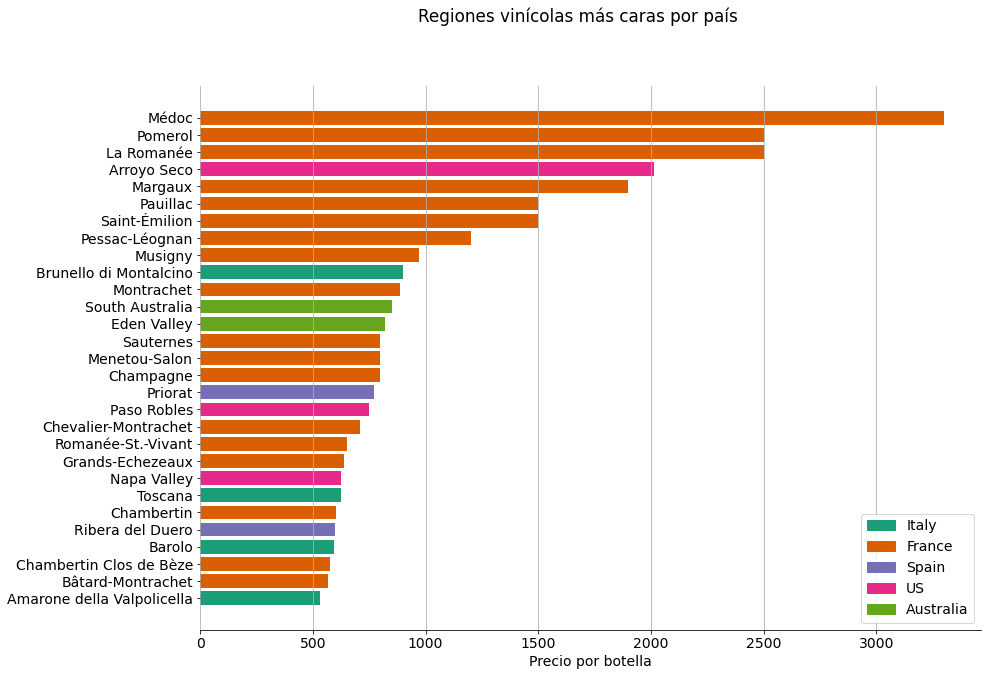

In [314]:
fig, ax = plot_wine_regions_2(plt.get_cmap('Dark2').colors)
fig.suptitle('Regiones vinícolas más caras por país', y=.99);

## Ejercicio 2

En este segundo ejercicio, nos gustaría saber, dentro de España, cuales son las regiones mejor valoradas. Además, nos gustaría destacar la comparativa entre las dos denominaciones de origen de tinto más conocidas: Rioja y Ribera de Duero.

In [379]:
# wine_df_subset_2=wine_df[wine_df['country']=='Spain'].loc[:,['country','region_1','points']].sort_values(by='points',ascending=False).dropna()
# wine_df_subset_2=wine_df_subset_2.groupby('region_1')['points'].aggregate('max').sort_values(ascending=False).reset_index()
# wine_df_subset_2=wine_df_subset_2.loc[:40].sort_values('points')
# wine_df_subset_2
#wine_df[(wine_df['country']=='Spain') & (wine_df['region_1'] =='Rioja')].tail(20)

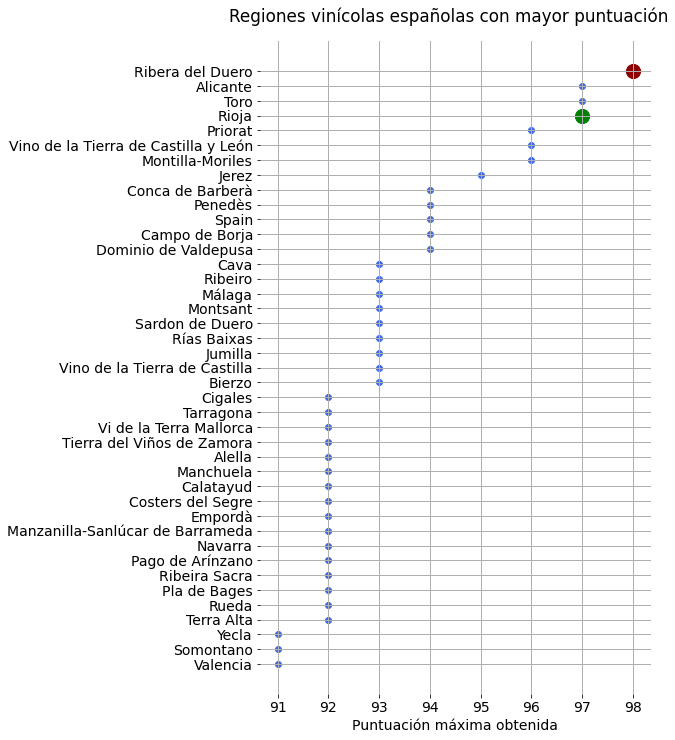

In [522]:
#Obtenemos las regiones vinícolas españolas y las ordenamos ascendentemente de menor a mayor puntuación
wine_df_subset_2=wine_df[wine_df['country']=='Spain'].loc[:,['country','region_1','points']].sort_values(by='points',ascending=False).dropna()
wine_df_subset_2=wine_df_subset_2.groupby('region_1')['points'].aggregate('max').sort_values(ascending=False).reset_index()
wine_df_subset_2=wine_df_subset_2.loc[:40].sort_values('points')

# Obtenemos el nombre y el nivel de alfabetización de dichos países.
regions = wine_df_subset_2['region_1']
points = wine_df_subset_2['points']

points_Ribera = wine_df_subset_2[wine_df_subset_2['region_1']=='Ribera del Duero'].loc[:,'points']
points_Rioja = wine_df_subset_2[wine_df_subset_2['region_1']=='Rioja'].loc[:,'points']



# Instanciamos la figura.
fig, ax = plt.subplots(figsize=(7, 12))

# Representamos estos valores.
ax.scatter(points, regions,color='royalblue')

ax.scatter(points_Ribera, ['Ribera del Duero'], color='darkred',s=200)
ax.scatter(points_Rioja, ['Rioja'], color='green',s=200,linewidth=1)

# Representamos la cuadrícula vertical.
ax.grid(mfcalt='red',linewidth=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Etiquetamos la figura.
ax.set_xlabel('Puntuación máxima obtenida')

fig.suptitle('Regiones vinícolas españolas con mayor puntuación', y=.92);

In [519]:
def plot_spanish_wine_regions(color_scale, highlight_regions=[]):
#     
#     Si se introduce una lista de regiones a destacar, la escala de colores debe alternar colores 
#     normales y destacados.
#     

# Seleccionamos los datos de las regiones españolas y obtnemos la máxima puntuación obtenida

    wine_df_subset_2=wine_df[wine_df['country']=='Spain'].loc[:,['country','region_1','points']].sort_values(by='points',ascending=False).dropna()
    wine_df_subset_2=wine_df_subset_2.groupby('region_1')['points'].aggregate('max').sort_values(ascending=False).reset_index()
    wine_df_subset_2=wine_df_subset_2.loc[:20].sort_values('points')
    
    
    # Generamos los diccionarios que mapean continentes con colores y la leyenda con este mapeo.
    region_color_map = dict()
    highlight_region_color_map = dict()
    legend_entries = list()

    for i, region in enumerate(wine_df_subset_2['region_1'].unique()):
            
        if highlight_regions:
            color = color_scale[4]#((i*2) % len(color_scale))]
            region_color_map[region] = color

            highlight_color = color_scale[5]#(i*2) % len(color_scale)+1]
            highlight_region_color_map[region] = highlight_color
        else:
            color = color_scale[i % len(color_scale)]
            region_color_map[region] = color

            
            
#         legend_entry = mpatches.Patch(color=color, label=region)
#         legend_entries.append(legend_entry)


    # Obtenemos las columnas a representar.
    regions = wine_df_subset_2['region_1']
    points = wine_df_subset_2['points']
    
    # Calculamos los colores que le corresponde a cada línea.
    #countries = wine_df_subset_2['country']
    
    regions_colors = [
        highlight_region_color_map[region] if region in highlight_regions 
        else region_color_map[region] for region, points in zip(regions, points)
    ]

    
    # Instanciamos la figura.
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Añadimos unas guías verticales.
    ax.grid(True, axis='x')

    # Representamos las líneas.
    
    ax.barh(regions, points, color=regions_colors)

    # Añadimos la leyenda.
#     ax.legend(handles=legend_entries)

    # Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
#     # Etiquetamos el eje X.
    ax.set_xlabel('Máxima puntuación obtenida')
  

    return fig, ax

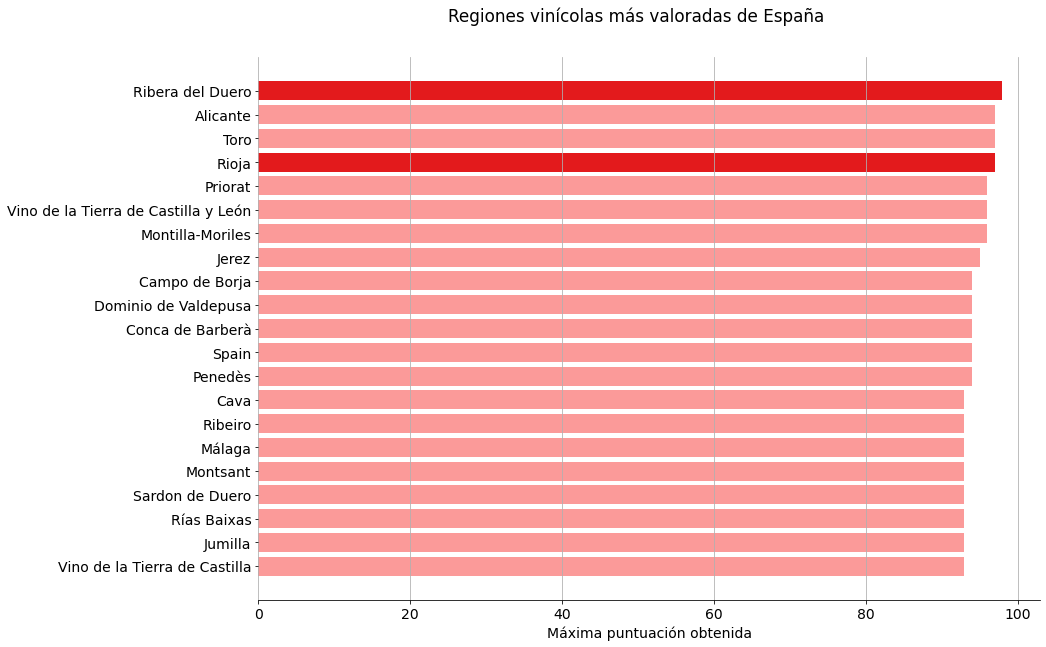

In [520]:
fig, ax = plot_spanish_wine_regions(plt.get_cmap('Paired').colors, highlight_regions=['Ribera del Duero','Rioja'])
fig.suptitle('Regiones vinícolas más valoradas de España', y=.95);

# Segunda parte: Supermercados

Para la segunda parte del Challenge cambiaremos al dataset [Supermarket sales](https://www.kaggle.com/aungpyaeap/supermarket-sales). Éste contiene la información de las ventas que se produjeron entre Enero y Marzo de 2019 en un supermercado anónimo. Encontramos categorías como la línea de producto de la compra o el género del comprador.

In [28]:
# Cargamos el csv en pandas.
supermarket_sales_df = pd.read_csv("./supermarket_sales.csv")

# Visualizamos las información de las columnas.
supermarket_sales_df.info()

# Casteamos la columna 'Date' a datetime.
supermarket_sales_df['Date'] = pd.to_datetime(supermarket_sales_df['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Ejercicio 3

Para tener una primera visión de los datos, nos gustaría conocer la venta bruta producida cada mes y la aportación de cada ciudad a esta cifra.

In [156]:
# Cada línea es una compra de un producto.
supermarket_sales_df_pivot = pd.pivot_table(supermarket_sales_df, values='Total', index=['Date'],
                     columns=['City'],aggfunc='sum')
supermarket_sales_df_pivot=supermarket_sales_df_pivot.resample('M').sum()
supermarket_sales_df_pivot


City,Mandalay,Naypyitaw,Yangon
Date,,,
2019-01-31,37176.0585,40434.6810,38681.1285
2019-02-28,34424.2710,32934.9825,29860.1205
2019-03-31,34597.3425,37199.0430,37659.1215


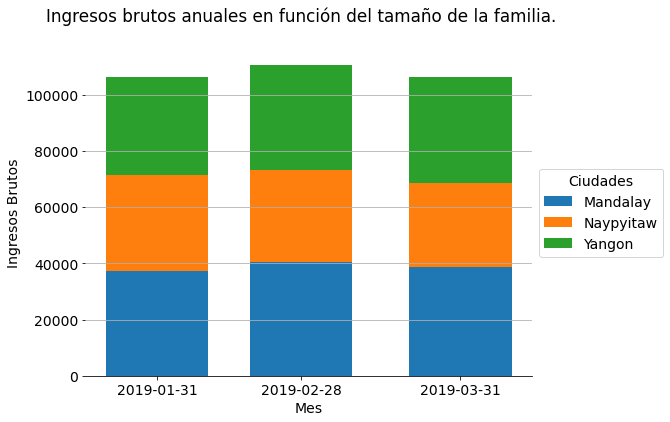

In [214]:
supermarket_sales_df_pivot = pd.pivot_table(supermarket_sales_df, values='Total', index=['Date'],
                     columns=['City'],aggfunc='sum')
supermarket_sales_df_pivot=supermarket_sales_df_pivot.resample('M').sum()

# Obtenemos las etiquetas del eje X.
x_labels = supermarket_sales_df_pivot.index
# Instanciamos el valor de cada color.

color_labels = supermarket_sales_df_pivot.columns

# Instanciamos la figura.
fig, ax = plt.subplots(figsize=(8, 6))

# Instanciamos un array con los valores del inicio de cada barra.
bottom_values = np.zeros(supermarket_sales_df_pivot.shape[1])

# Iteramos la tabla pivotada representamos los valores.
for row, color_label in zip(supermarket_sales_df_pivot.values, color_labels):
    # Representamos un piso de las barras.
    ax.bar(x_labels,row, width=20, bottom=bottom_values, label=color_label)
    # Actualizamos el inicio de las próximas barras.
    bottom_values += row
    
# Etiquetamos la figura.
fig.suptitle('Ingresos brutos anuales en función del tamaño de la familia.')

ax.set_xticks(list(supermarket_sales_df_pivot.index))
ax.set_xlabel('Mes')
ax.set_ylabel('Ingresos Brutos')

# Mostramos la cuadricula.
ax.grid(True, axis='y')

# Ocultamos el marco.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
  
    
# Mostramos la leyenda.
ax.legend(title="Ciudades", loc='center left', bbox_to_anchor=(1, 0.5))

## Ejercicio 4

Un dato muy interesante de este dataset es el campo 'Product line', éste categoriza los productos en seis grupos: Health and beauty, Electronic accessories, Home and lifestyle, Sports and travel, Food and beverages, Fashion accessories.

Para conocer la forma que tienen de comprar los clientes de estos supermercados, nos gustaría visualizar cuánto se han gastado los hombres y las mujeres en cada una de estas categorías.

In [225]:
supermarket_sales_df_pivot = pd.pivot_table(supermarket_sales_df, values='Total', index=['Product line'],
                      columns=['Gender'],aggfunc='sum')
supermarket_sales_df_pivot

Gender,Female,Male
Product line,,
Electronic accessories,27102.0225,27235.5090
Fashion accessories,30437.4000,23868.4950
Food and beverages,33170.9175,22973.9265
Health and beauty,18560.9865,30632.7525
Home and lifestyle,30036.8775,23825.0355
Sports and travel,28574.7210,26548.1055


In [458]:
def grouped_bar_plot(
    df, amount_key, group_key, color_key, width=0.35, title=None, amount_title=None, group_title=None,
    color_title=None, rotate_x_labels=False, aggfunc='mean',palette='Blues', alternate_xlabel=None
):
    assert aggfunc in ('mean', 'sum')
    
    color_scale = plt.get_cmap(palette)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Ordenamos el DataFrame por la clave del grupo y del color.
    df = df.sort_values([group_key, color_key])

    # Obtenemos las etiquetas de los grupos.
    if alternate_xlabel:
        group_labels = df[alternate_xlabel].unique()
    else:
        group_labels = df[group_key].unique()
    
    # Calculamos el número de grupos.
    number_of_groups = group_labels.shape[0]
    
    # Calculamos el número de barras por grupo.
    number_of_bars_per_group = df[color_key].unique().shape[0]
    
    # Agrupamos el DataFrame de tal forma que solo haya un valor por cada par grupo-color.
    df = df.groupby([color_key, group_key])
    
    if aggfunc == 'mean':
        df = df.mean()
    elif aggfunc == 'sum':
        df = df.sum()
    
    # Calculamos la distancia entre los grupos.
    distance = width * (number_of_bars_per_group + 1)
    
    # Calculamos la posición de cada grupo en el eje X.
    group_x_possition = np.linspace(1, distance * number_of_groups, number_of_groups)
    
    #print(group_x_possition)
    
    # Creamos un DataFrame por cada color para iterarlo.
    df = df.groupby(color_key)
    
    # Iteramos los grupos y, en cada iteración, representamos todas las barras de un mismo color.
    for i, df_subset in enumerate(df):
        # Calculamos la posición relativa de la barra con respecto al grupo.
                
        relative_position = ((1 - number_of_bars_per_group)/2 + i) * width
        
        # Representamos las barras de un mismo color.
        ax.bar(
            group_x_possition + relative_position,
            df_subset[1][amount_key],
            width=width,
            color=color_scale((i+1)/number_of_bars_per_group),
            label=df_subset[1].index[0][0]
        )
    
    # Añadimos la leyenda.    
    ax.legend(bbox_to_anchor=(1.05, 1), title=color_title)

    # Etiquetamos la figura.
    fig.suptitle(title)

    ax.set_xticks(group_x_possition)
    if rotate_x_labels:
        ax.set_xticklabels(group_labels, rotation=30, ha='right')
    else:
        ax.set_xticklabels(group_labels)
        
    ax.set_ylabel(amount_title)
    ax.set_xlabel(group_title)

    # Mostramos la cuadricula.
    ax.grid(True, axis='y')

    # Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
        
    return fig, ax

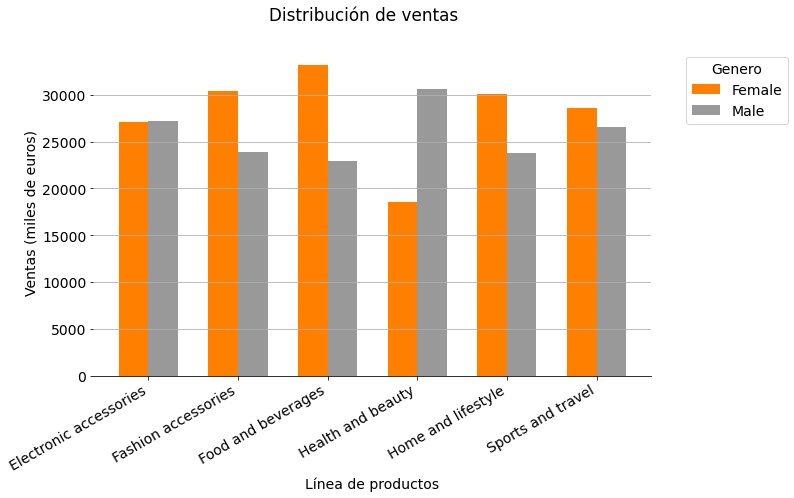

In [452]:
fig, ax = grouped_bar_plot(
    supermarket_sales_df,
    amount_key='Total',
    color_key='Gender',
    group_key='Product line',
    title='Distribución de ventas',
    amount_title='Ventas (miles de euros)',
    color_title='Genero',
    group_title='Línea de productos',
    rotate_x_labels=True,
    aggfunc='sum',
    palette='Set1'
)

## Ejercicio 5

Por úlltimo, nos gustar saber cuánto se vende cada día de la semana, de media, de cada línea de producto.

In [246]:
supermarket_sales_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [482]:
supermarket_sales_df_subset=supermarket_sales_df.loc[:,['Date','Product line','Total']].sort_values('Date')
supermarket_sales_df_subset['Day of week']=supermarket_sales_df['Date'].dt.day_name()
supermarket_sales_df_subset['Number Day of week']=supermarket_sales_df['Date'].dt.dayofweek.sort_values()
supermarket_sales_df_subset= supermarket_sales_df_subset.groupby(['Number Day of week','Day of week','Product line'])['Total'].mean()
supermarket_sales_df_subset=supermarket_sales_df_subset.reset_index()

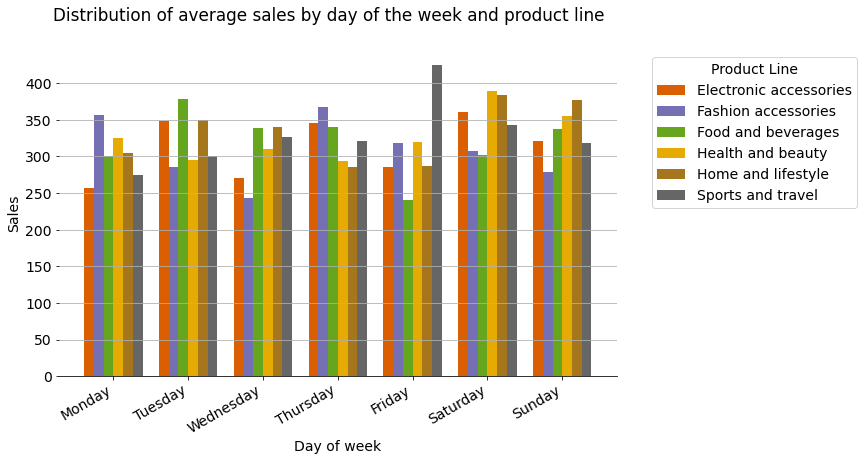

In [486]:
fig, ax = grouped_bar_plot(
    supermarket_sales_df_subset,
    amount_key='Total',
    color_key='Product line',
    group_key='Number Day of week',
    title='Distribution of average sales by day of the week and product line',
    amount_title='Sales',
    color_title='Product Line',
    group_title='Day of week',
    rotate_x_labels=True,
    aggfunc='mean',
    palette='Dark2',
    alternate_xlabel='Day of week'
    
)